In [1]:
import pandas as pd
import numpy as np
import time
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

c:\Users\LAPSHOP\anaconda3\envs\my_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset
Jobs = pd.read_csv("JobsFE.csv")

In [3]:
# Data Cleaning
# Remove duplicates and fill missing values
Jobs.drop_duplicates(subset=["Job Id"], inplace=True)
Jobs["job_role_and_duties"].fillna("", inplace=True)
Jobs["requisite_skill"].fillna("", inplace=True)
Jobs["position"].fillna("", inplace=True)

C:\Users\LAPSHOP\AppData\Local\Temp\ipykernel_23092\3432261488.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Jobs["job_role_and_duties"].fillna("", inplace=True)
C:\Users\LAPSHOP\AppData\Local\Temp\ipykernel_23092\3432261488.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [4]:
# Combine relevant columns into a single text column
Jobs["job_text"] = (
    Jobs["position"].astype(str) + " " +
    Jobs["job_role_and_duties"].astype(str) + " " +
    Jobs["requisite_skill"].astype(str)
)

In [5]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [6]:
# Example resume text
resume_text = """Yomna Waleed Elsayed Ahmed Hassan
Junior machine learning engineering
yomnawaleed2002@gmail.com
EGYPT, AlGharbia goverment, tanta city.
Yomna Waleed
yomna_waleed
+201118064546
19/05/2002
YomnaWaleed
yomna_waleed
EDUCATION
Faculty of Engineering, Department of Computers and Control, Tanta university 2020 – 2025
Tanta, Egypt
TRAINING
Manara Tech 04/2023 – present
PROFILE
I am a dedicated engineering student specializing in Computer and Automatic Control, with a strong academic background and practical experience in
programming and software development. I excelled in my coursework, achieving an excellent degree in my second year and a very good grade in my
first year. I have a solid foundation in Python programming and libraries essential for data science and machine learning, including NumPy, pandas,
and Matplotlib. My participation in the International Collegiate Programming Contest (ICPC) as a team leader has further honed my problem-solving
skills.
I am actively expanding my expertise in machine learning (ML), particularly in Natural Language Processing (NLP) and Generative AI, having
completed supervised machine learning courses and gained practical experience with various deep learning architectures, including DNNs, RNNs, and
CNNs. My background also includes full-stack development using React.js and Node.js, enabling me to effectively integrate machine learning models
into web applications.
SKILLS
Programming Languages & Technologies:
•Python: Proficient
•C++: Proficient
•React.js: Competent
•Node.js: Amateur
•HTML/CSS: Competent
Data Structures & Algorithms
•Proficient in implementing algorithms and data structures in Python
and C++
•Strong foundation in problem-solving techniques, demonstrated
through participation in competitive programming
Machine Learning & Data Science:
•Libraries: NumPy, pandas, Matplotlib (Competent)
•Machine Learning: Supervised learning (regression, classification)
using Scikit-learn (Competent)
•Deep Learning: Familiar with TensorFlow and PyTorch (Amateur)
•Architectures: DNN, RNN, CNN, Object Detection, Word Detection,
Transfer Learning (Amateur)
•Generative AI: Currently learning (Amateur)
SOFT SKILLS
Project management and leadership
While I was working on the maze game project, I managed to divide the
tasks among the group, although this was challenging because we chose
a three-dimensional game that was beyond what we had learned.
Thinking outside the box
"While choosing a project, I always try to challenge myself and attempt
something that is difficult for others to implement, such as selecting a
three-dimensional game instead of a two-dimensional one, despite the
difficulty of it. I successfully completed the game."
PROJECTS
Email-SMS-Spam-Classifier, Developed a supervised machine learning model to classify emails and SMS messages as
spam or not using Python and Scikit-learn.
08/2024 – 08/2024
Egypt-House-Price-Prediction--Regression-Project, Built a regression model to predict house prices based on
various features, implemented with an HTML interface for user interaction.
08/2024 – 08/2024
Nonogram Puzzle, Created a Nonogram puzzle generator that utilizes backtracking methods and a CSP approach to
solve generated puzzles. My contribution was in developing the solver algorithm.
2024
3d maze game, Developed a 3D maze game using OpenGL and Python, where players navigate to collect coins and solve
puzzles. My role included building the player's movement mechanics and 3D interactions.
2023
Railway Ticket booking, Designed and implemented a train ticket booking system using Node.js, React.js, and MS SQL
for database management, allowing users to book and cancel tickets.
2023
simple memory gain, Created a memory game using React.js that challenges users to find pairs of matching images. 2023
CERTIFICATES
ICPC Qualification 2022
Problem Solving
Back-end enineering using Nodejs and Express
Ideal Student Recognition
ICPC qualification 2023
Zero to Hero in Front-end Development with React
Fullstack Engineering with React and Node.js
Volunteer Work at College and University
LANGUAGES
English
EF SET English Certificate
French"""

### another method for get similarities using SBERT

In [7]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Choose a more accurate model if needed
model = SentenceTransformer("all-mpnet-base-v2")

# Preprocess the text data (assuming resume_text and job_texts are already preprocessed)
resume_embedding = model.encode([resume_text])
job_embeddings = model.encode(Jobs["job_text"])

# Calculate cosine similarities
similarities = cosine_similarity(resume_embedding, job_embeddings).flatten()



In [8]:
# Set a similarity threshold (adjust based on your needs)
similarity_threshold = 0.4

# Filter out jobs below the threshold
relevant_indices = np.where(similarities >= similarity_threshold)[0]

# Sort the relevant indices by similarity score
sorted_indices = relevant_indices[np.argsort(-similarities[relevant_indices])]

#### Get top N relevant jobs with SBERT similarity

In [9]:
print(sorted_indices)

[7363 9409 7406 9702 4196 3471 7628  448 1944 1363 3365  403 4179 1978
 1250 1304 6035 8832 3870 2133 3004 1488 9077 5679]


In [10]:
# Get the top N relevant job IDs
top_n = 50
relevant_job_ids = Jobs.iloc[sorted_indices[:top_n]]["Job Id"].tolist()

In [11]:
print(f"the relevant_job_ids {relevant_job_ids}")
print(len(relevant_job_ids))

the relevant_job_ids [2027725316497091, 1384036741810650, 3042660353333977, 1664810592052377, 1227100998565233, 556045185980013, 2049865366415549, 1471835796989801, 2973044963656949, 1278156265563034, 956220317793134, 3089656468794782, 2815162405534159, 2704243050080316, 2131482901498230, 2716774249506789, 2986401077009885, 1913338430447830, 50050561683450, 1853720228172297, 503370432399661, 724683515252858, 1067777464493633, 1323883780511473]
24


### Define MRR calculation function 

In [12]:
# Define MRR calculation function
def calculate_mrr(recommended_jobs, relevant_job_ids):
    """
    Calculate Mean Reciprocal Rank (MRR) for the recommended jobs.
    
    :param recommended_jobs: List of recommended jobs (each job should have a 'Job Id').
    :param relevant_job_ids: List of relevant job IDs (ground truth).
    :return: MRR score.
    """
    reciprocal_ranks = []
    
    for relevant_id in relevant_job_ids:
        for rank, job in enumerate(recommended_jobs, start=1):
            if job["Job Id"] == relevant_id:
                reciprocal_ranks.append(1.0 / rank)
                break
    
    if len(reciprocal_ranks) == 0:
        return 0.0  # If no relevant jobs are found, MRR is 0.
    
    return sum(reciprocal_ranks) / len(reciprocal_ranks)


##### Define evaluation function using MRR


In [13]:
def evaluate_model_results_mrr(recommended_jobs, relevant_job_ids):
    """
    Evaluates the model results using Mean Reciprocal Rank (MRR).
    
    :param recommended_jobs: List of recommended jobs (each job should have a 'Job Id').
    :param relevant_job_ids: List of relevant job IDs (ground truth).
    :return: MRR score.
    """
    mrr_score = calculate_mrr(recommended_jobs, relevant_job_ids)
    print(f"MRR Score: {mrr_score:.4f}")
    return mrr_score

# Example relevant job IDs (ground truth)
# If no labels are provided, use the TF-IDF-based relevant_job_ids
if not relevant_job_ids:
    relevant_job_ids = relevant_job_ids  # Use the TF-IDF-based relevant job IDs


### Load and evaluate SBERT model

In [14]:
from SBERTmodel import JobRecommendationSystem as SBERTmodel


In [15]:
start = time.time()
recommender_SBERT = SBERTmodel("JobsFE.csv")
recommended_jobs_SBERT = recommender_SBERT.recommend_jobs(resume_text, top_n=50)
time_SBERT = time.time() - start
print(f"the time of  Excution of SBERT model is {time_SBERT}")

Loaded job data with columns: Index(['Job Id', 'workplace', 'working_mode', 'salary', 'position',
       'job_role_and_duties', 'requisite_skill', 'offer_details'],
      dtype='object')
the time of  Excution of SBERT model is 75.21094274520874


In [16]:
SBERT_mrr = evaluate_model_results_mrr(recommended_jobs_SBERT["recommended_jobs"], relevant_job_ids)

MRR Score: 0.1244


#### Load and evaluate FastText model

In [17]:
from FastText.FastTextmodel import JobRecommendationSystem as FastTextmodel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
start = time.time()
recommender_fastText = FastTextmodel("JobsFE.csv")
recommended_jobs_fastText = recommender_fastText.recommend_jobs(resume_text, top_n=50)
time_fastText = time.time() - start
print(f" the Excution time of FastText is {time_fastText}")

 the Excution time of FastText is 89.98713564872742


In [19]:
FastText_mrr = evaluate_model_results_mrr(recommended_jobs_fastText["recommended_jobs"], relevant_job_ids)

MRR Score: 0.1736


#### Load and evaluate BM25 model

In [20]:
from BM25model import JobRecommendationSystem as BM25model

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
start = time.time()
recommender_BM25 = BM25model("JobsFE.csv")
recommended_jobs_BM25 = recommender_BM25.recommend_jobs(resume_text, top_n=50)
time_BM25 = time.time() - start
print(f" the Excution time of BM25 is {time_BM25}")

Loaded job data with columns: Index(['Job Id', 'workplace', 'working_mode', 'salary', 'position',
       'job_role_and_duties', 'requisite_skill', 'offer_details'],
      dtype='object')
 the Excution time of BM25 is 167.2642743587494


In [22]:
BM25_mrr = evaluate_model_results_mrr(recommended_jobs_BM25["recommended_jobs"], relevant_job_ids)

MRR Score: 0.1736


#### Load and evaluate TF-IDF model

In [23]:
from TFIDFmodel import JobRecommendationSystem as TFIDFmodel

In [24]:
start = time.time()
recommender_TFIDF = TFIDFmodel("JobsFE.csv")
recommended_jobs_TFIDF = recommender_TFIDF.recommend_jobs(resume_text, top_n=50)
time_TFIDF = time.time() - start
print(f"the Execution time of TF-IDF model is {time_TFIDF}")

the Execution time of TF-IDF model is 0.8407325744628906


In [25]:
TFIDF_mrr = evaluate_model_results_mrr(recommended_jobs_TFIDF["recommended_jobs"], relevant_job_ids)

MRR Score: 0.1736


#### Load the evaluate KNN model 

In [26]:
from KNNmodel import JobRecommendationSystem as KNNmodel

In [27]:
start = time.time()
recommender_KNN = KNNmodel("JobsFE.csv")
recommended_jobs_KNN = recommender_KNN.recommend_jobs(resume_text, top_n=50)
time_KNN = time.time() - start
print(f"the Excution time of KNN is {time_KNN}")

the Excution time of KNN is 3.1402769088745117


In [28]:
KNN_mrr = evaluate_model_results_mrr(recommended_jobs_KNN["recommended_jobs"], relevant_job_ids)

MRR Score: 0.1736


#### Load the evaluate LDA model 

In [29]:
from LDAmodel import JobRecommendationSystem as LDAmodel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
start = time.time()
recommender_LDA = LDAmodel("Jobs_with_clusters.csv")
recommended_jobs_LDA = recommender_LDA.recommend_jobs(resume_text, top_n=50)
time_LDA = time.time() - start
print(f"the excution time of LDA model is {time_LDA}")

Index(['Job Id', 'workplace', 'working_mode', 'salary', 'position',
       'job_role_and_duties', 'requisite_skill', 'offer_details', 'job_text',
       'cluster'],
      dtype='object')
the excution time of LDA model is 62.49177551269531


In [31]:
LDA_mrr = evaluate_model_results_mrr(recommended_jobs_LDA["recommended_jobs"], relevant_job_ids)

MRR Score: 0.0000


### Plot MRR and execution time

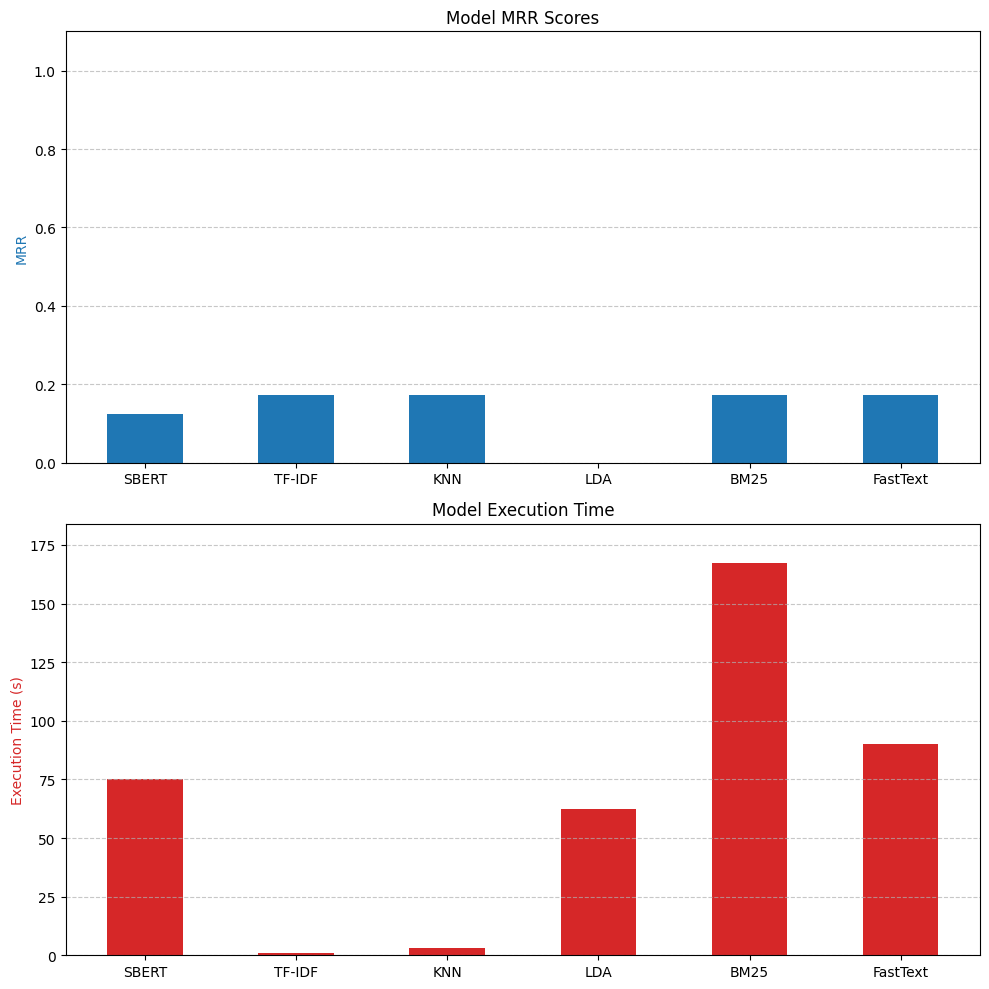

In [32]:
import matplotlib.pyplot as plt
models = ['SBERT', 'TF-IDF', 'KNN', 'LDA', 'BM25', 'FastText']
mrr_scores = [SBERT_mrr, TFIDF_mrr, KNN_mrr, LDA_mrr, BM25_mrr, FastText_mrr]
execution_time = [time_SBERT, time_TFIDF, time_KNN, time_LDA, time_BM25, time_fastText]

x = np.arange(len(models))
width = 0.5

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
# MRR Plot
ax1.bar(x, mrr_scores, width, color='tab:blue')
ax1.set_ylabel('MRR', color='tab:blue')
ax1.set_title('Model MRR Scores')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_ylim(0, 1.1)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Execution Time Plot
ax2.bar(x, execution_time, width, color='tab:red')
ax2.set_ylabel('Execution Time (s)', color='tab:red')
ax2.set_title('Model Execution Time')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.set_ylim(0, max(execution_time) * 1.1)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()